In [143]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

class Perceptron0:
    def __init__(self, eta=1):
        """
        eta：学习率
        """
        self._eta = eta
        self._w = 0
        self._b = 0
        
    def fit(self, X, y):
        """
        algorithm: 感知机学习算法原始形式的实现
        X.shape: (m samples, n features) 训练集
        y: (m samples, )
        """
        rows, cols = X.shape
        self._w = np.zeros(cols)
        while True:
            update_times = 0
            for i in range(rows):
                is_error = y[i] * (np.dot(self._w, X[i]) + self._b)
                if is_error <= 0:
                    self._w += self._eta * y[i] * X[i]
                    self._b += self._eta * y[i]
                    update_times += 1
            if update_times == 0:
                break
        return self
        
    def predict(self, X):
        """
        X: 测试集
        """
        y = np.dot(self._w, X.T) + self._b
        y_pred = np.where(y>0, 1, -1)
        return y_pred
    
class Percetron1:
    def __init__(self, eta=1):
        """
        eta：学习率
        """
        self._eta = eta
        self._w = 0
        self._b = 0
        self._alpha = 0
    
    def fit(self, X, y):
        """
        algorithm: 感知机学习算法对偶形式的实现
        X.shape: (m samples, n features) 训练集
        y: (m samples,)
        """
        rows, cols = X.shape
        self._alpha = np.zeros(rows)
        gram = np.dot(X, X.T)
        while True:
            update_times = 0
            for i in range(rows):
                is_error = y[i] * (np.multiply(self._alpha, np.multiply(y, gram[i])).sum() + self._b)
                if is_error <= 0:
                    self._alpha[i] += self._eta
                    self._b += self._eta * y[i]
            if update_times == 0:
                break
        
        self._w = np.multiply(self._alpha.reshape(-1, 1), np.multiply(y.reshape(-1, 1), X)).sum(axis=0)
        return self
    
    def predict(self, X):
        y = np.dot(self._w, X.T) + self._b
        y_pred = np.where(y>0, 1, -1)
        return y_pred
        

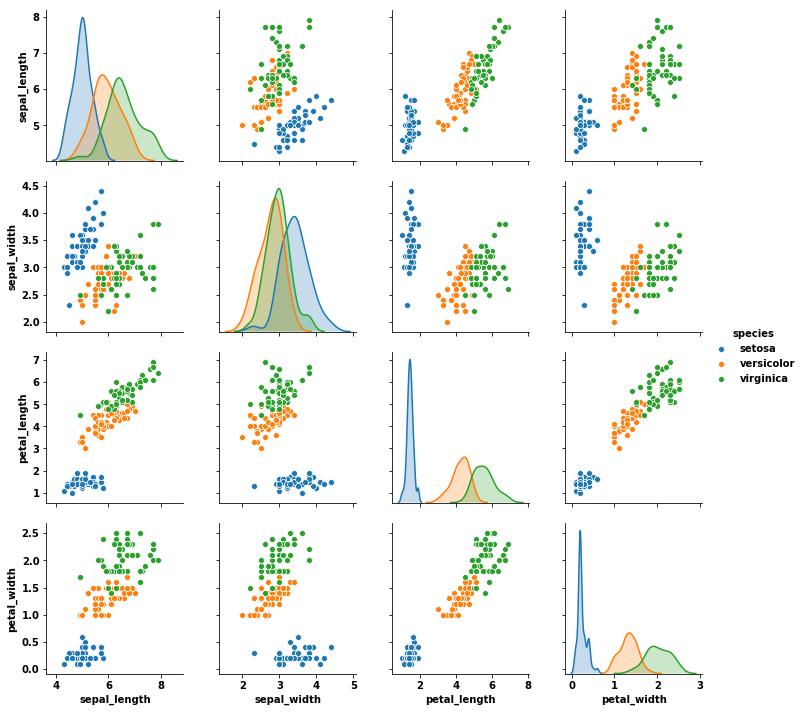

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [134]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')
plt.show()
iris

In [135]:
# 筛选出两类
new_iris = iris[iris['species'] != 'virginica']

In [136]:
# 将label 转换成数字1,0
new_iris['species'].replace(["setosa","versicolor"], [1,-1], inplace=True)

X = new_iris.drop(['species','sepal_length','sepal_width'], axis=1)
y = new_iris.drop(['sepal_length','sepal_width','petal_length','petal_width'], axis=1)

F:\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [137]:
X = X.as_matrix()
y = y.as_matrix().flatten()
X.shape, y.shape

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


((100, 2), (100,))

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
p = Perceptron0()
p.fit(X_train, y_train)
y_pre = p.predict(X_test)
print(accuracy_score(y_test, y_pre))

1.0


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
p = Percetron1()
p.fit(X_train, y_train)
y_pre = p.predict(X_test)
print(accuracy_score(y_test, y_pre))

1.0
